In [3]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import glob

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set_style("darkgrid")
sns.set_context("paper")

In [7]:
alerts = pd.read_json("data/alarms.json")

In [8]:
alerts.sample()["source"].iloc[0]

{'asn': 11537,
 'owner': 'INTERNET2-RESEARCH-EDU, US',
 'num_pairs': '15',
 'sites': ['GLOW',
  'BU_ATLAS_TIER2',
  'TAIWAN-LCG2',
  'CA-WATERLOO-T2',
  'MWT2',
  'TRIUMF-LCG2',
  'AGLT2',
  'CA-SFU-T2',
  'HEPHY-VIENNA',
  'SPRACE',
  'BEGRID-ULB-VUB',
  'WT2',
  'NEBRASKA'],
 'from': '2023-02-07 17:13',
 'to': '2023-02-08 17:13',
 'alarm_id': '2308572242ef117395fafe8fcdb0d1e4457b57756b11e77c274f0139'}

In [9]:
alerts["owner"] = alerts["source"].apply(lambda x: x["owner"])

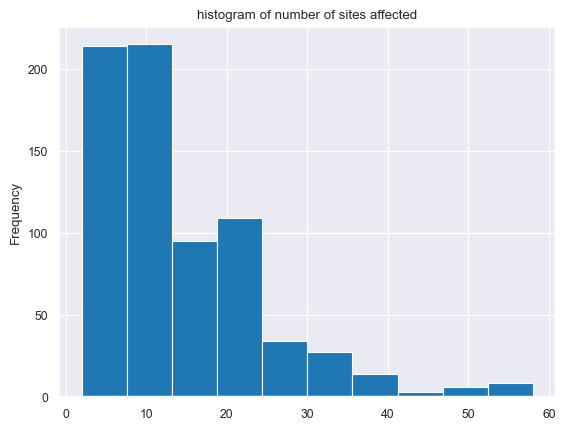

In [10]:
alerts["tags"].apply(len).plot(kind='hist', title="histogram of number of sites affected");

In [11]:
len(set(alerts["tags"].sum()))

97

In [12]:
import wordcloud
from collections import Counter

In [13]:
counter = Counter(alerts["tags"].sum())
total = sum(counter.values())
freq = {k:v/total for k,v in counter.items()}
wc = wordcloud.WordCloud(width=1200, height=1200)
wc.fit_words(freq)
fig = px.imshow(wc, )
fig.update_layout(width=600, height=600)

In [15]:
counter.most_common(30)

[('INFN-T1', 396),
 ('FZK-LCG2', 328),
 ('PIC', 296),
 ('GRIF-IRFU', 285),
 ('GRIF-LPNHE', 257),
 ('BNL-ATLAS', 256),
 ('NDGF-T1', 236),
 ('SARA-MATRIX', 229),
 ('USCMS-FNAL-WC1', 228),
 ('TRIUMF-LCG2', 227),
 ('MWT2', 224),
 ('DESY-ZN', 223),
 ('IN2P3-LAPP', 206),
 ('IN2P3-CPPM', 204),
 ('CA-SFU-T2', 201),
 ('AGLT2', 200),
 ('NEBRASKA', 195),
 ('SWT2_CPB', 191),
 ('KR-KISTI-GSDC-01', 184),
 ('UAM-LCG2', 177),
 ('TAIWAN-LCG2', 167),
 ('GLOW', 165),
 ('PRAGUELCG2', 163),
 ('UKI-SOUTHGRID-RALPP', 162),
 ('JP-KEK-CRC-02', 155),
 ('CIT_CMS_T2', 153),
 ('CA-VICTORIA-WESTGRID-T2', 141),
 ('UKI-LT2-QMUL', 139),
 ('UKI-NORTHGRID-LIV-HEP', 134),
 ('UKI-SOUTHGRID-OX-HEP', 134)]

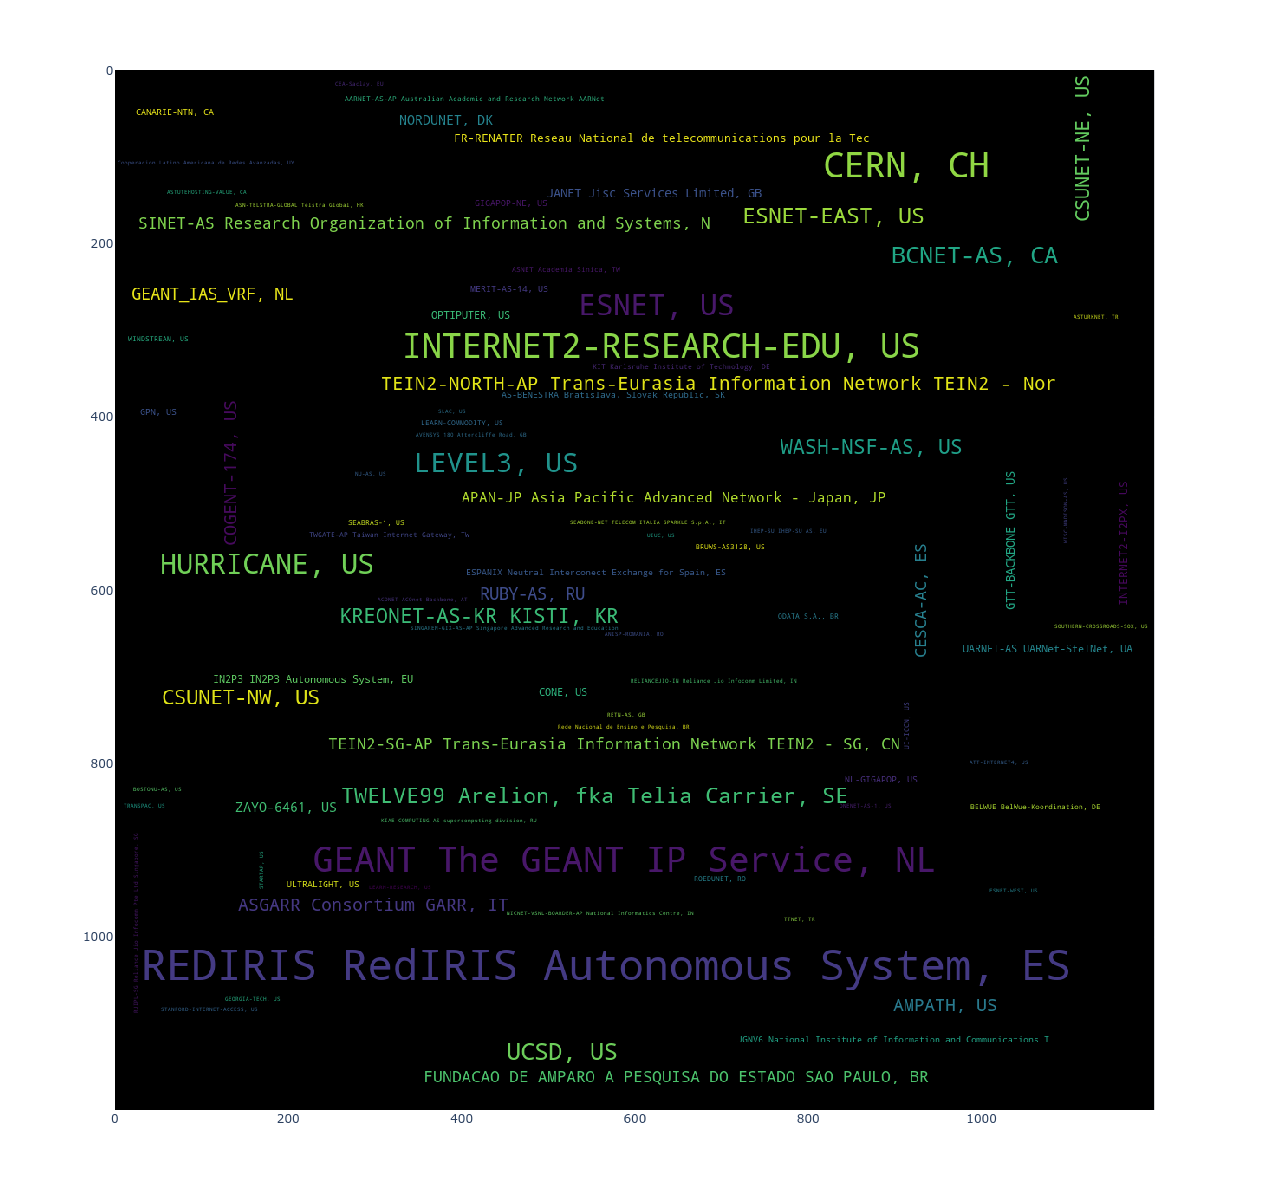

In [14]:
counter = Counter(alerts["owner"])
total = sum(counter.values())
freq = {k:v/total for k,v in counter.items()}
wc = wordcloud.WordCloud(width=1200, height=1200)
wc.fit_words(freq)
fig = px.imshow(wc, )
fig.update_layout(width=1200, height=1200)

In [15]:
tmp = pd.DataFrame(freq, index=['frequency']).T.sort_values(by='frequency', ascending=False)

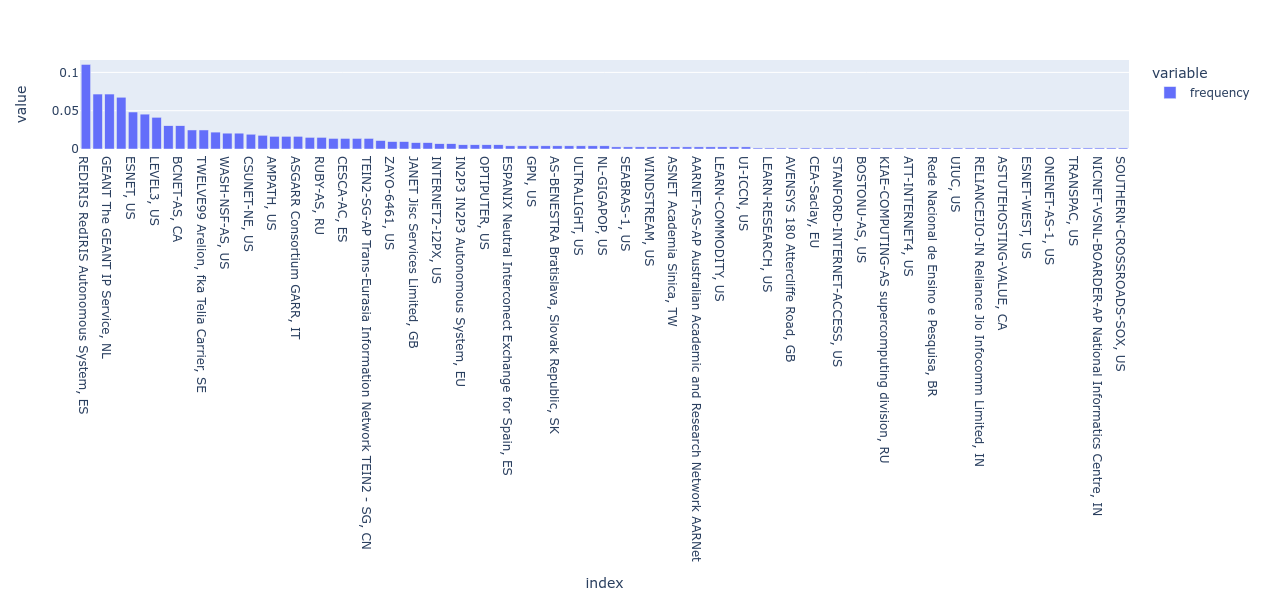

In [16]:
fig = tmp.plot(kind='bar', backend='plotly') 
fig.update_layout(width=1200, height=600)

In [17]:
tmp.reset_index(inplace=True)
tmp['state'] = tmp["index"].str.split(', ').apply(lambda x: x[-1])
tmp.set_index('index', inplace=True)

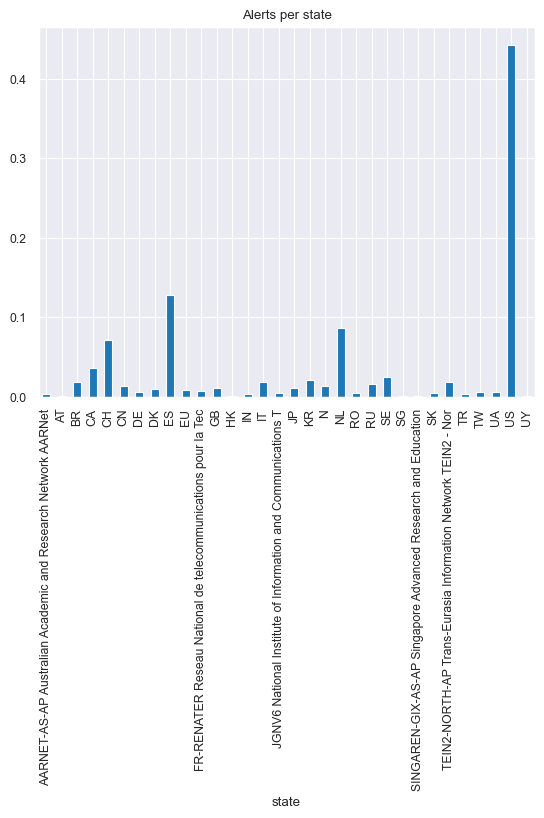

In [18]:
tmp.groupby('state')['frequency'].sum().plot(kind='bar', title='Alerts per state');

In [19]:
alerts.iloc[0]['source']

{'asn': 766,
 'owner': 'REDIRIS RedIRIS Autonomous System, ES',
 'num_pairs': '46',
 'sites': ['BNL-ATLAS',
  'FZK-LCG2',
  'UAM-LCG2',
  'GRIF-LPNHE',
  'IN2P3-LAPP',
  'MWT2',
  'INFN-T1',
  'CA-SFU-T2',
  'SWT2_CPB',
  'INFN-FRASCATI',
  'JP-KEK-CRC-02',
  'TAIWAN-LCG2',
  'GRIF-IRFU',
  'NDGF-T1',
  'IN2P3-CPPM',
  'DESY-ZN',
  'AGLT2',
  'TRIUMF-LCG2'],
 'from': '2022-12-31 17:13',
 'to': '2023-01-01 17:13',
 'alarm_id': 'b5fe06bb29d7d908dc552c67f45c5849abb736142a9658b5df735ab1'}

In [20]:
alerts.iloc[0]

category                                              Networking
subcategory                                                 RENs
event                                               path changed
body                                                Path changed
tags           [BNL-ATLAS, FZK-LCG2, UAM-LCG2, GRIF-LPNHE, IN...
source         {'asn': 766, 'owner': 'REDIRIS RedIRIS Autonom...
created_at                            2023-01-01 17:22:48.871000
owner                      REDIRIS RedIRIS Autonomous System, ES
Name: 0, dtype: object

In [21]:
for col in ["from", "to", "num_pairs", "asn"]:
    alerts[col] = alerts["source"].apply(lambda x: x[col])

In [22]:
for col in ["from", "to"]:
    alerts[col] = pd.to_datetime(alerts[col])

In [23]:
x = alerts["duration"] = (alerts["to"] - alerts["from"])

In [24]:
x.dt.total_seconds()

0      86400.0
1      86400.0
2      86400.0
3      86400.0
4      86400.0
        ...   
720    86400.0
721    86400.0
722    86400.0
723    86400.0
724    86400.0
Length: 725, dtype: float64

<AxesSubplot: >

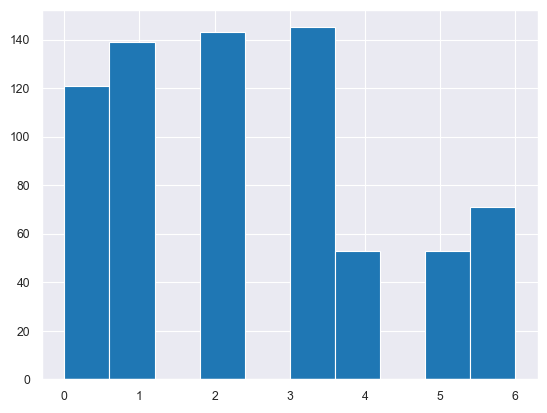

In [25]:
alerts["from"].dt.dayofweek.hist()

<AxesSubplot: >

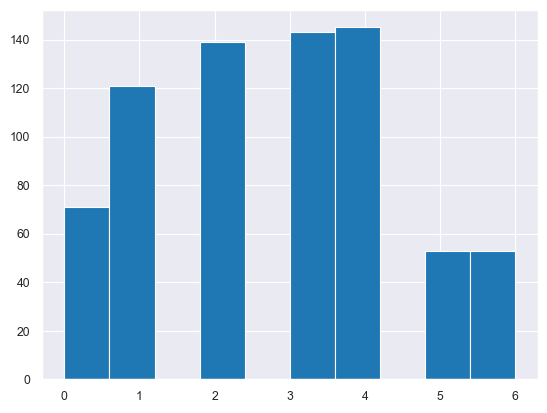

In [26]:
alerts["to"].dt.dayofweek.hist()

In [27]:
alerts["hod"] = alerts["from"].dt.hour + 1

In [28]:
alerts["dow"] = alerts["from"].dt.dayofweek + 1

<AxesSubplot: >

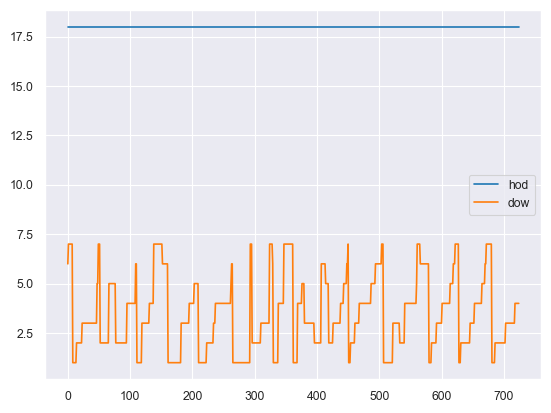

In [29]:
alerts[["hod", "dow"]].plot()

<AxesSubplot: >

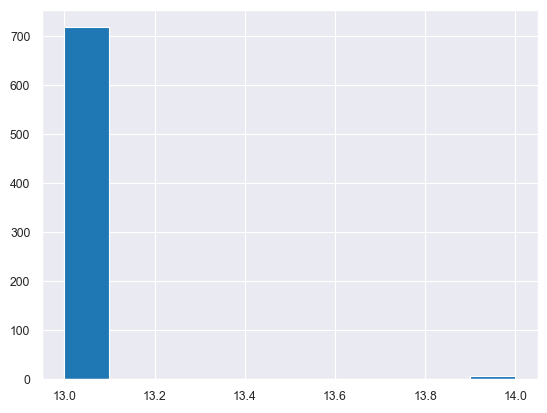

In [30]:
alerts["to"].dt.minute.hist()